In [1]:
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
# read the data

In [60]:
accuracy=pd.read_excel('Model_Evaluation.xlsx',sheet_name="Accuracy_all_Models")
accuracy.head(3)

,Ecodistrict,# Records,# Unique Townships,Accuracy (%) LASSO,Accuracy (%) PCR,Accuracy (%) MLP,Accuracy (%) RR,Accuracy (%) PCA+RF,Accuracy (%) FFN
0,748,1199,109,90.73,90.03,89.57,90.06,90.49,90.17
1,826,1177,107,86.25,84.11,86.79,86.77,86.81,85.33
2,752,1111,101,89.76,87.80,88.69,90.66,88.48,89.04


In [61]:
accuracy_df=accuracy

In [63]:
accuracy_df=accuracy_df.rename(columns={"Accuracy (%) LASSO":"LASSO", "Accuracy (%) PCR":"PCR", "Accuracy (%) MLP":"MLP", "Accuracy (%) RR":"RR", "Accuracy (%) PCA+RF":"PCA+RF", "Accuracy (%) FFN":"FFN"} )

In [29]:
# line plot for accuracy
#alt.Chart(accuracy).transform_fold(
#    ['Accuracy (%) LASSO',
#          'Accuracy (%) PCR',
#          'Accuracy (%) MLP',
#          'Accuracy (%) RR',
#          'Accuracy (%) PCA+RF',
#         'Accuracy (%) FFN'],).mark_line().encode(
#    x=alt.X('# Unique Townships:O',axis=alt.Axis(labelAngle=0)),
#    y=alt.Y('value:Q',title="Accuracy Percentage"),
#    color='key:N'
#).properties(width=5000,height=500,title="Accuracy Plot")

In [10]:
#acc_df = accuracy.groupby("# Unique Townships").mean().reset_index()


In [30]:
# line plot for MSE
#alt.Chart(MSE).transform_fold(
#    ['MSE Test LASSO',
#     'MSE Test PCR',
#     'MSE Test MLP',
#     'MSE Test RR',
#     'MSE Test PCA+RF',
#     'MSE Test FFN'],).mark_line().encode(
#    x=alt.X('# Unique Townships:O',axis=alt.Axis(labelAngle=0)),
#    y=alt.Y('value:Q',title="MSE"),
#    color='key:N'
#).properties(width=5000,height=500,title="MSE Plot")

In [64]:
accuracy_df = accuracy_df.groupby("# Unique Townships").mean().reset_index()

In [65]:
accuracy_df.columns

Index(['# Unique Townships', 'Ecodistrict', '# Records', 'LASSO', 'PCR', 'MLP',
       'RR', 'PCA+RF', 'FFN'],
      dtype='object')

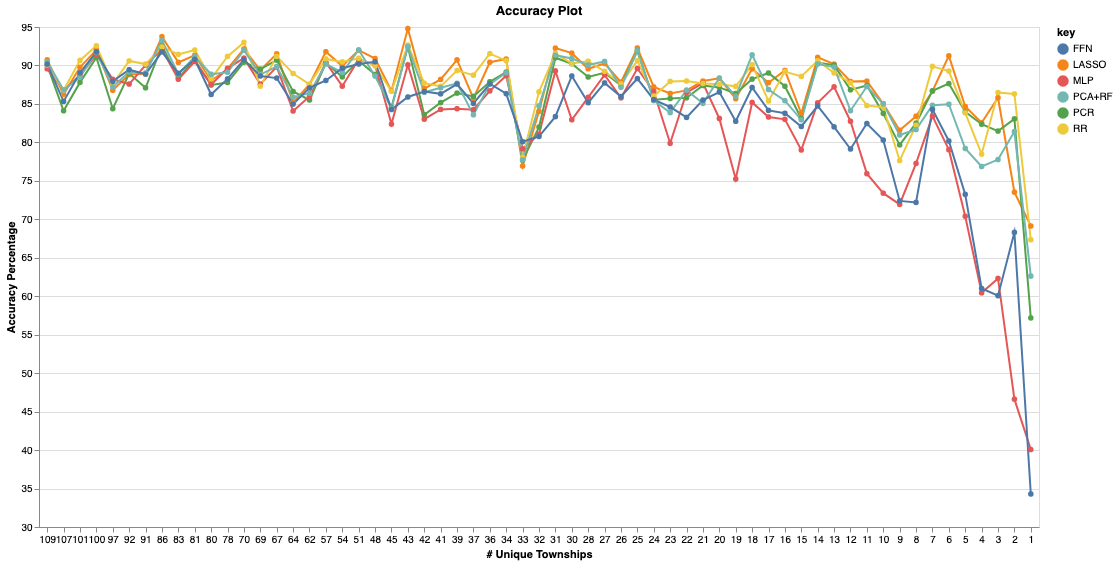

In [69]:
# line plot for accuracy
alt.Chart(accuracy_df).transform_fold(
    ['LASSO',
          'PCR',
          'MLP',
          'RR',
          'PCA+RF',
         'FFN'],).mark_line(point=alt.OverlayMarkDef(color="red")).encode(
    x=alt.X('# Unique Townships:O',axis=alt.Axis(labelAngle=0),sort="-x"),
    y=alt.Y('value:Q',title="Accuracy Percentage",scale=alt.Scale(zero=False)),
    
    color='key:N'
).properties(width=1000,height=500,title="Accuracy Plot")

In [83]:
MSE=pd.read_excel('Model_Evaluation.xlsx',sheet_name="MSE-Test_all_Models")
MSE.head(3)

,Ecodistrict,# Records,# Unique Townships,MSE Test LASSO,MSE Test PCR,MSE Test MLP,MSE Test RR,MSE Test PCA+RF,MSE Test FFN
0,748,1199,109,82.73,91.94,91.701453,89.104337,88.33,94.610396
1,826,1177,107,113.16,125.30,105.664239,107.440074,106.41,129.771199
2,752,1111,101,91.93,106.26,102.725946,92.111527,101.78,100.159099


In [84]:
MSE_df=MSE

In [87]:
MSE_df=MSE_df.rename(columns={"MSE Test LASSO":"LASSO", "MSE Test PCR":"PCR", "MSE Test MLP":"MLP", "MSE Test RR":"RR", "MSE Test PCA+RF":"PCA+RF", "MSE Test FFN":"FFN"} )

In [88]:
MSE_df.columns

Index(['Ecodistrict', '# Records', '# Unique Townships', 'LASSO', 'PCR', 'MLP',
       'RR', 'PCA+RF', 'FFN'],
      dtype='object')

In [89]:
MSE_df = MSE_df.groupby('# Unique Townships').mean().reset_index()

Index(['# Unique Townships', 'Ecodistrict', '# Records', 'MSE Test LASSO',
       'MSE Test PCR', 'MSE Test MLP', 'MSE Test RR', 'MSE Test PCA+RF',
       'MSE Test FFN'],
      dtype='object')

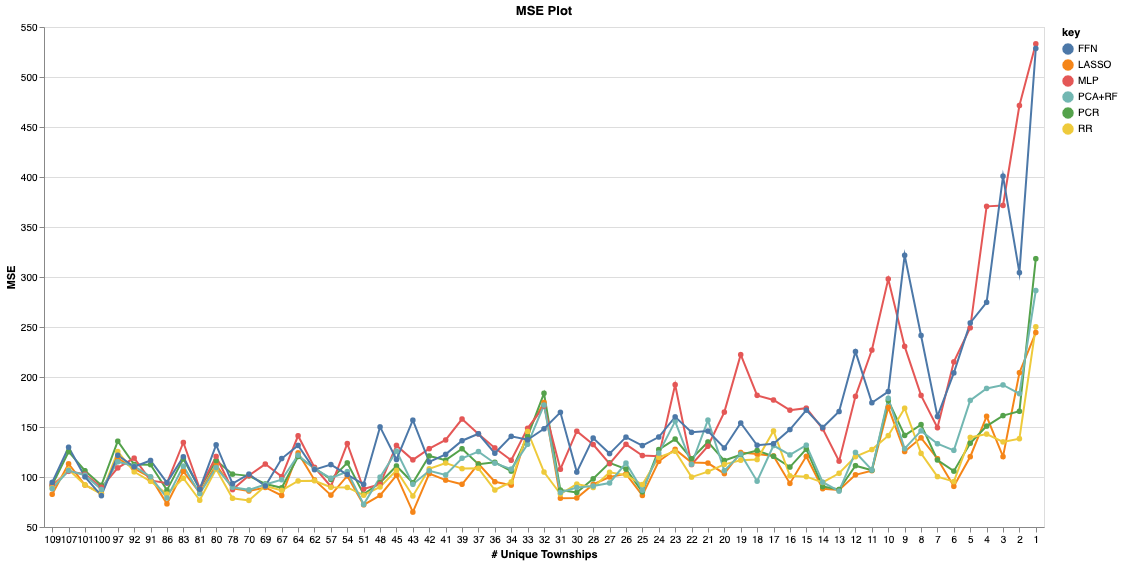

In [90]:
# line plot for MSE
alt.Chart(MSE_df).transform_fold(
    ['LASSO',
     'PCR',
     'MLP',
     'RR',
     'PCA+RF',
     'FFN'],).mark_line(point=alt.OverlayMarkDef(color="red")).encode(
    x=alt.X('# Unique Townships:O',axis=alt.Axis(labelAngle=0),sort="-x"),
    y=alt.Y('value:Q',title="MSE",scale=alt.Scale(zero=False)),
    color='key:N'
).properties(width=1000,height=500,title="MSE Plot")